# 利用PCA简化数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt

将数据转换成前N个主成分的伪代码：  
&emsp;&emsp;去除平均值  
&emsp;&emsp;计算协方差矩阵  
&emsp;&emsp;计算协方差矩阵的特征值和特征向量  
&emsp;&emsp;将特征值从大到小排序  
&emsp;&emsp;保留最上面的N个特征向量  
&emsp;&emsp;将数据转换到上述N个特征向量构建的新空间中

In [2]:
# 加载数据
def loadDataSet(fileName, delim='\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float,line)) for line in stringArr]
    return np.mat(datArr)

# pca
# dataMat: 用于进行PCA操作的数据集，topNfeat：应用的N个特征
def pca(dataMat, topNfeat=9999999):
    # 按列得到均值，即求各个特征的均值
    meanVals = dataMat.mean(0)
    # 计算并减去原始数据集的平均值
    meanRemoved = dataMat - meanVals
    # 计算协方差，若rowvar=0，说明传入的数据一行代表一个样本，
    # 若非0，说明传入的数据一列代表一个样本。
    # 因为meanRemoved每一行代表一个样本，所以将rowvar设置为0
    covMat = np.cov(meanRemoved, rowvar=0)
    # 求特征值，返回特征值和特征向量
    eigVals,eigVects = np.linalg.eig(np.mat(covMat))
    # 对特征值进行排序（从小到大）
    eigValInd = np.argsort(eigVals)
    # 最大的topNfeat个特征值的下标
    eigValInd = eigValInd[:-(topNfeat+1):-1]
    # 最大的topNfeat个特征值对应的特征向量
    redEigVects = eigVects[:,eigValInd]
    # 将数据转换到新空间（得到低维特征空间的数据集）
    lowDDataMat = meanRemoved * redEigVects
    # 重构数据
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    return lowDDataMat, reconMat

测试1000个数据点组成的数据集

In [3]:
dataMat = loadDataSet('testSet.txt')

In [4]:
lowMat, reconMat = pca(dataMat, 1)

lowMat包含了降维之后的矩阵，是个一维矩阵

In [5]:
np.shape(lowMat)

(1000, 1)

将降维后的数据和原始数据一起绘制出来

In [6]:
def display(dataMat, reconMat):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(dataMat[:, 0].flatten().A[0], dataMat[:, 1].flatten().A[0], marker='^', s=90)
    ax.scatter(reconMat[:, 0].flatten().A[0], reconMat[:, 1].flatten().A[0], marker='o', s=50, c='red')
    plt.show()

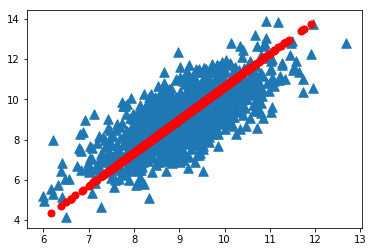

In [7]:
display(dataMat, reconMat)

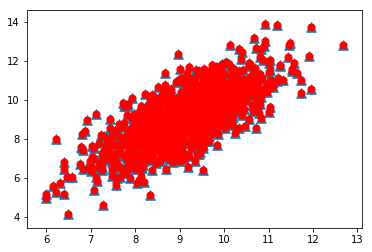

In [8]:
lowMat, reconMat = pca(dataMat, 2)
display(dataMat, reconMat)